In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

# Using Rebound to get Initial conditions

# Sun + Earth 

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')


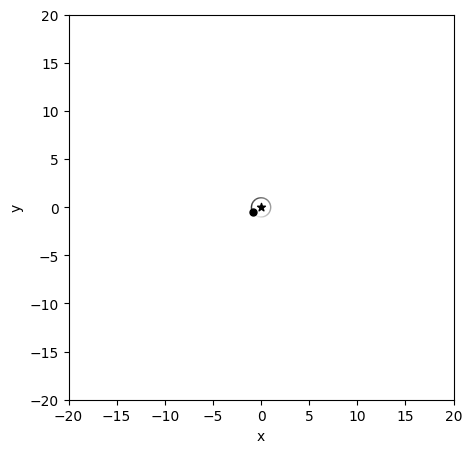

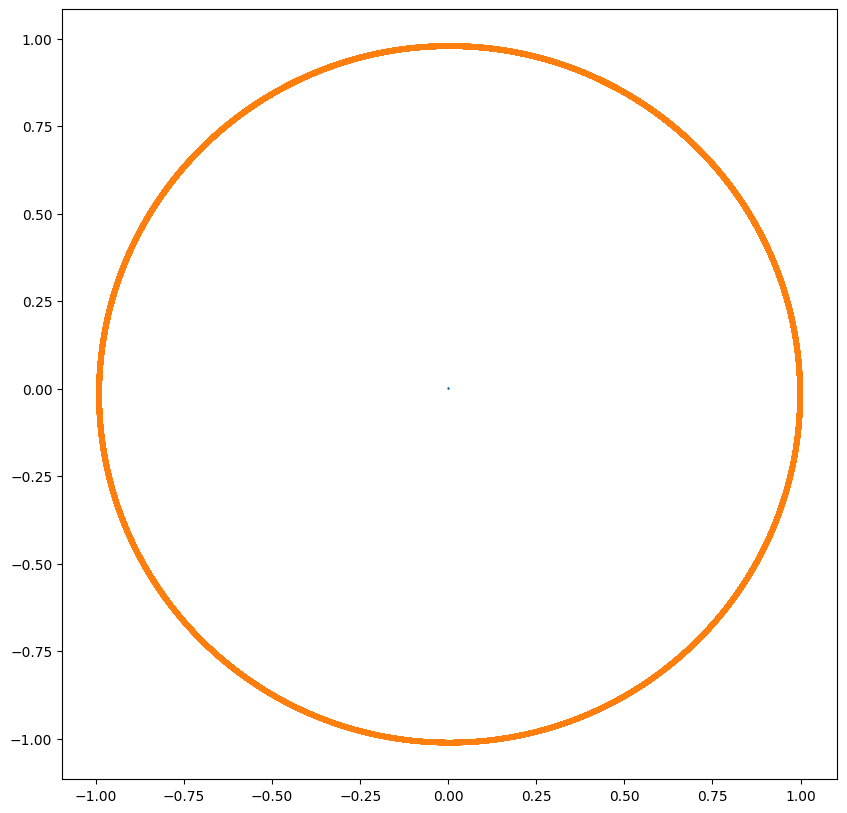

In [2]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add("Sun")
sim.add("Earth")
sim.integrator = "ias15" 
sim.move_to_com()        # We always move to the center of momentum frame before an integration
fig, ax = rebound.OrbitPlot(sim,xlim=[-20,20],ylim=[-20,20])
plt.show()

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('Earth-Sun',states)
    
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,70.*year, Noutputs)
x = np.zeros((sim.N,Noutputs))
y = np.zeros((sim.N,Noutputs))
z = np.zeros((sim.N,Noutputs))


for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(sim.N):
        x[j][i] = ps[j].x   # This stores the data which allows us to plot it later
        y[j][i] = ps[j].y   # This stores the data which allows us to plot it later
        z[j][i] = ps[j].z   # This stores the data which allows us to plot it later
        
fig = plt.figure(figsize=(10,10))
for i in range(len(x)):
    plt.plot(x[i], y[i])

## Sun + Comet

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'P/2018 A4'... 
Found: PANSTARRS (P/2018 A4) 


/home/moon/.local/lib/python3.10/site-packages/rebound/horizons.py:168: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


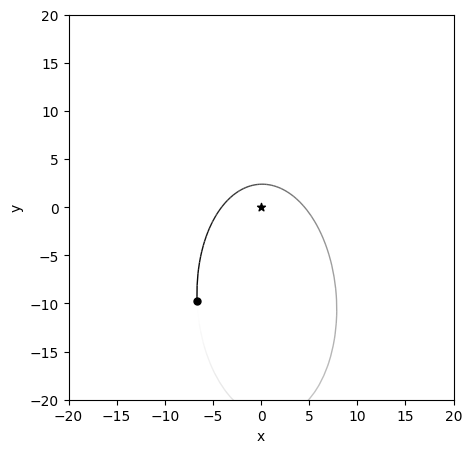

(-20.0, 20.0)

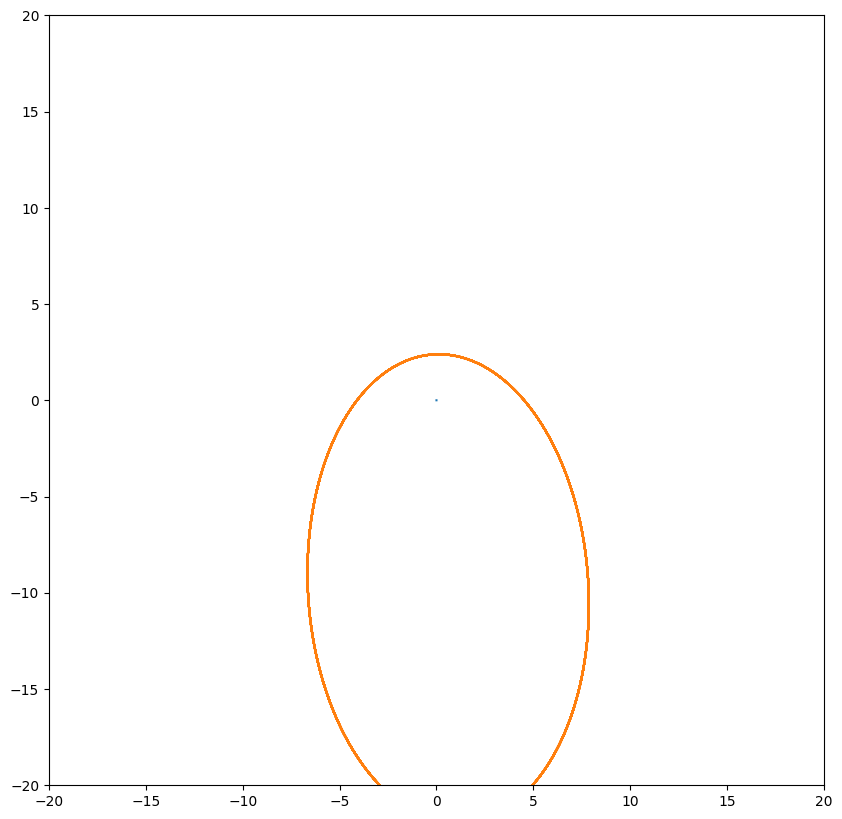

In [3]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add("Sun")
sim.add("P/2018 A4")
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration

fig, ax = rebound.OrbitPlot(sim,xlim=[-20,20],ylim=[-20,20])
plt.show()

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
ps[1].m=1e-9

states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('Comet-Sun',states)
    
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,100.*year, Noutputs)
x = np.zeros((sim.N,Noutputs))
y = np.zeros((sim.N,Noutputs))
z = np.zeros((sim.N,Noutputs))

for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(sim.N):
        x[j][i] = ps[j].x   # This stores the data which allows us to plot it later
        y[j][i] = ps[j].y   # This stores the data which allows us to plot it later
        z[j][i] = ps[j].z   # This stores the data which allows us to plot it later
        
fig = plt.figure(figsize=(10,10))
for i in range(len(x)):
    plt.plot(x[i], y[i])
plt.xlim(-20,20)
plt.ylim(-20,20)

# Sun + Venus + Earth (3 body problem)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')


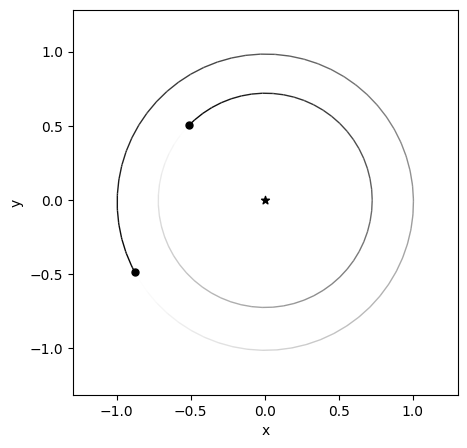

states


(-1.5, 1.5)

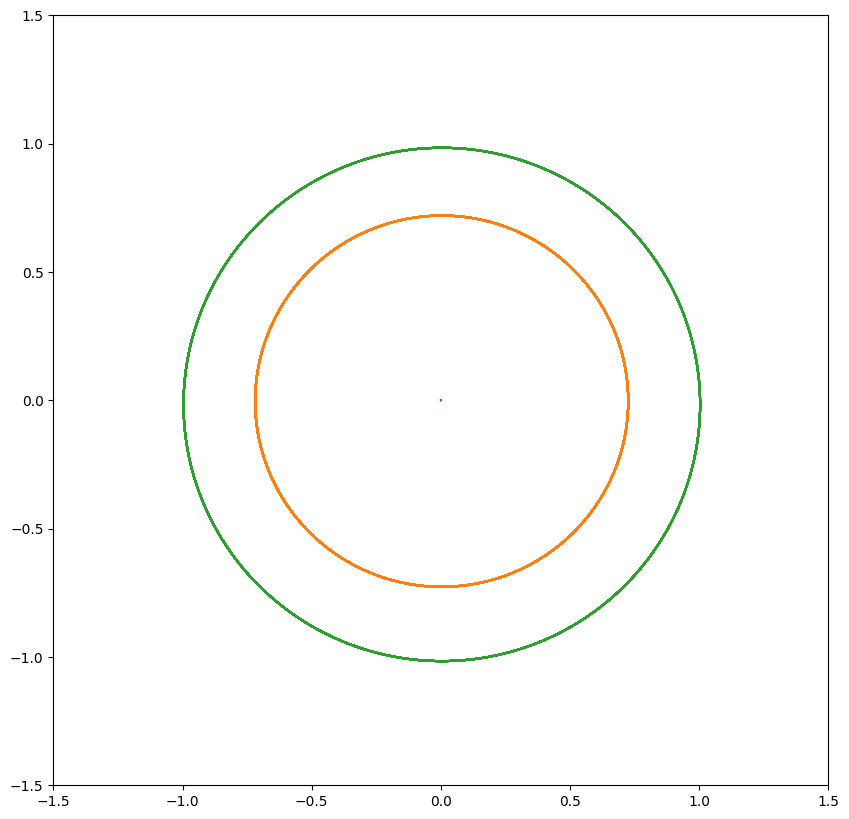

In [4]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add("Sun")
sim.add("Venus")
sim.add("Earth")
sim.integrator = "ias15"
sim.move_to_com()        # We always move to the center of momentum frame before an integration


fig, ax = rebound.OrbitPlot(sim)
plt.show()

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
print('states')
np.save('Earth-Venus-Sun',states)
    
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,1.5*year, Noutputs)
x = np.zeros((sim.N,Noutputs))
y = np.zeros((sim.N,Noutputs))
z = np.zeros((sim.N,Noutputs))

for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(sim.N):
        x[j][i] = ps[j].x   # This stores the data which allows us to plot it later
        y[j][i] = ps[j].y   # This stores the data which allows us to plot it later
        z[j][i] = ps[j].z   # This stores the data which allows us to plot it later
        
fig = plt.figure(figsize=(10,10))
for i in range(len(x)):
    plt.plot(x[i], y[i])
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

# Jupiter + Io + Europa (3 body problem + Resonance)

Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Io'... 
Found: Io (501) (chosen from query 'Io')
Searching NASA Horizons for 'Europa'... 
Found: Europa (502) (chosen from query 'Europa')


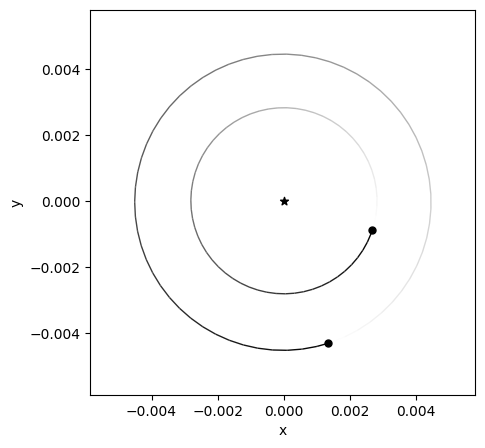

states


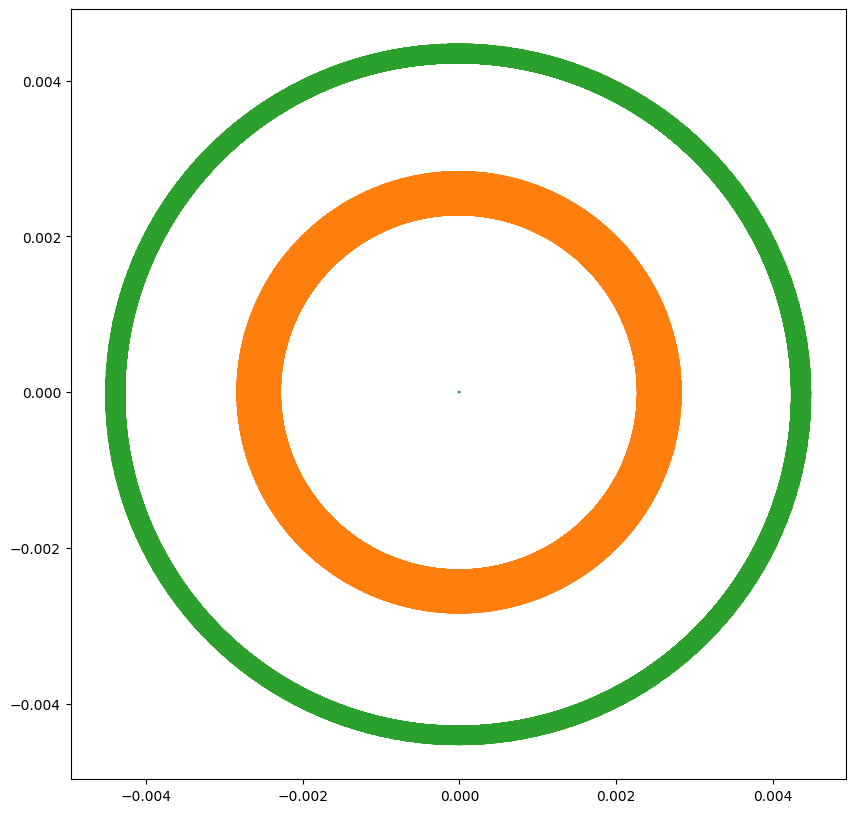

In [5]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add("Jupiter")
sim.add("Io")
sim.add("Europa")
sim.integrator = "ias15"
sim.move_to_com()        # We always move to the center of momentum frame before an integration


fig, ax = rebound.OrbitPlot(sim)
plt.show()

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
print('states')
np.save('Io-Europa-Jupiter',states)
    
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,1.5*year, Noutputs)
x = np.zeros((sim.N,Noutputs))
y = np.zeros((sim.N,Noutputs))
z = np.zeros((sim.N,Noutputs))

for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(sim.N):
        x[j][i] = ps[j].x   # This stores the data which allows us to plot it later
        y[j][i] = ps[j].y   # This stores the data which allows us to plot it later
        z[j][i] = ps[j].z   # This stores the data which allows us to plot it later
        
fig = plt.figure(figsize=(10,10))
for i in range(len(x)):
    plt.plot(x[i], y[i])

# Whole Solar System


Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


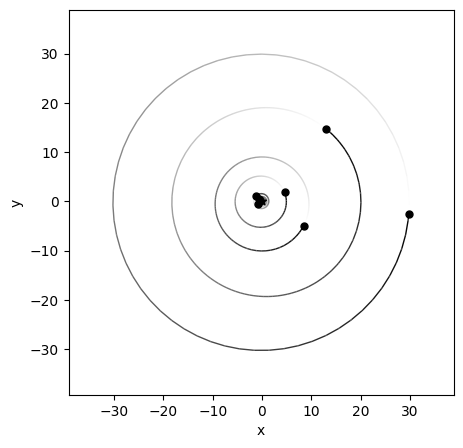

states


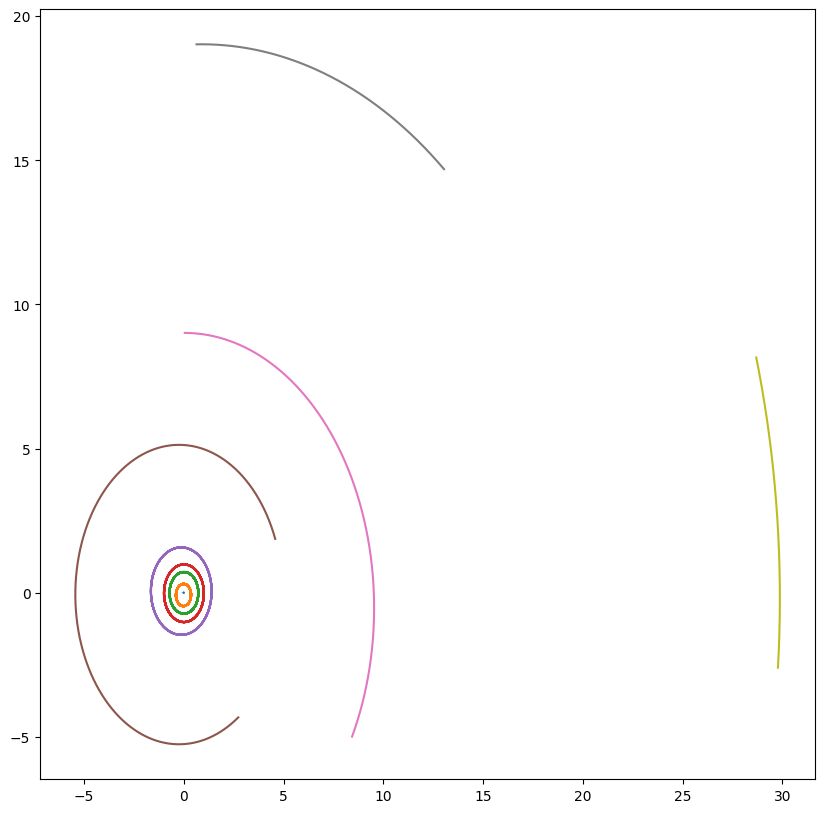

In [6]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add("Sun")
sim.add("Mercury")
sim.add("Venus")
sim.add("Earth")
sim.add("Mars")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Uranus")
sim.add("Neptune")
sim.integrator = "ias15"
sim.move_to_com()        # We always move to the center of momentum frame before an integration


fig, ax = rebound.OrbitPlot(sim)
plt.show()

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
print('states')
np.save('Full-Solar',states)
    
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,1.5*year, Noutputs)
x = np.zeros((sim.N,Noutputs))
y = np.zeros((sim.N,Noutputs))
z = np.zeros((sim.N,Noutputs))

for i,time in enumerate(times):
    sim.integrate(time)
    for j in range(sim.N):
        x[j][i] = ps[j].x   # This stores the data which allows us to plot it later
        y[j][i] = ps[j].y   # This stores the data which allows us to plot it later
        z[j][i] = ps[j].z   # This stores the data which allows us to plot it later
        
fig = plt.figure(figsize=(10,10))
for i in range(len(x)):
    plt.plot(x[i], y[i])

# Barycentric Cases


In [7]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=1)
sim.add(m=1e-2,a=1,e=0)
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('bary_3',states)

sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=1)
sim.add(m=1e-1,a=1,e=0)
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('bary_2',states)

sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=1)
sim.add(m=0.5,a=1,e=0)
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('bary_1',states)

sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=1)
sim.add(m=1,a=1,e=0)
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('bary_0',states)

## Logo Case

In [8]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
sim.add(m=1)
sim.add(m=0.5,a=1,e=0.7,omega=np.pi/4)
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs
states = []
for i in range(len(ps)):
    states.append([ps[i].m,ps[i].x,ps[i].y,ps[i].z,ps[i].vx,ps[i].vy,ps[i].vz])
states = np.array(states)
np.save('logo',states)
